<a href="https://colab.research.google.com/github/AmitHasanShuvo/Machine-Learning-Projects/blob/master/CIFAR_Images_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # CIFAR 10 CLASSIFICATION


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [ ]:
data = tf.keras.datasets.cifar10
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.


### **ANALYSING THE DATA**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape


(10000, 32, 32, 3)

In [ ]:
print(train_labels[0])

[6]


In [ ]:

print(train_images[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


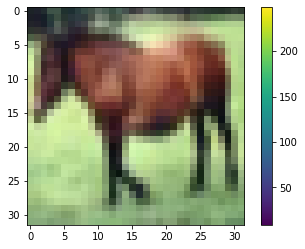

In [ ]:
plt.figure()
plt.imshow(train_images[7]) # Plotting the 7th image of the dataset
plt.colorbar()
plt.grid(False)

plt.show()

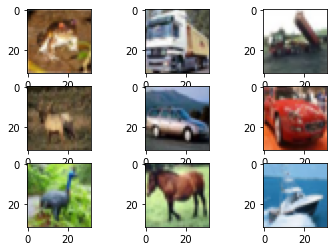

In [ ]:
for i in range(9):      #Plotting first 9 images of the CIFAR 10 dataset
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

### NORMALISE

In [ ]:


train_images, test_images = train_images / 255.0, test_images / 255.0


## **MODELLING**

In [ ]:
model1 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])



In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 1.7372 - accuracy: 0.3488 - val_loss: 1.1969 - val_accuracy: 0.5712
Epoch 2/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1721 - accuracy: 0.5823 - val_loss: 1.0329 - val_accuracy: 0.6343
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9881 - accuracy: 0.6540 - val_loss: 0.9514 - val_accuracy: 0.6683
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8608 - accuracy: 0.6976 - val_loss: 0.9139 - val_accuracy: 0.6781
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7738 - accuracy: 0.7258 - val_loss: 0.8888 - val_accuracy: 0.6932
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7049 - accuracy: 0.7524 - val_loss: 0.8906 - val_accuracy: 0.6932
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6459 - accuracy: 0.7707 - val_loss: 0.8680 - val_accuracy:

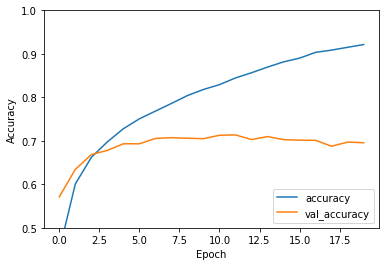

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

 ## ***MODEL 2 - DEEP NETWORK WITH DILATED CONVOLUTION***

---



In [ ]:
model2 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', padding='same',input_shape=(32, 32, 3)),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), dilation_rate=2, activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),dilation_rate=2, activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3),dilation_rate=2, activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),dilation_rate=2, activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),dilation_rate=2, activation='relu',padding='same'),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9963 - accuracy: 0.2221 - val_loss: 1.6202 - val_accuracy: 0.3823
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5111 - accuracy: 0.4249 - val_loss: 1.3477 - val_accuracy: 0.5101
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2516 - accuracy: 0.5430 - val_loss: 1.1888 - val_accuracy: 0.5697
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0999 - accuracy: 0.6073 - val_loss: 1.0732 - val_accuracy: 0.6142
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9815 - accuracy: 0.6518 - val_loss: 1.0484 - val_accuracy: 0.6309
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8931 - accuracy: 0.6854 - val_loss: 0.9855 - val_accuracy: 0.6498
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8256 - accuracy: 0.7067 - val_loss: 0.9738 - val_accuracy:

In [ ]:
print(history2)
print ("Train Accuracy 2 =" , history2.history['accuracy'])
print("Test Accuracy 2= " , history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.title('MODEL 2 - DEEP WITH DILATION')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc2 = np.mean(history2.history['accuracy'])
test_acc2 = np.mean(history2.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc2)
print("AVERAGE TEST ACCURACY =",test_acc2)

## ***MODEL 3 - DEEP NETWORK WITHOUT DILATION***

---



In [ ]:
model3 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', padding='same',input_shape=(32, 32, 3)),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [20]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9779 - accuracy: 0.2505 - val_loss: 1.5383 - val_accuracy: 0.4260
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4355 - accuracy: 0.4624 - val_loss: 1.2134 - val_accuracy: 0.5506
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1796 - accuracy: 0.5737 - val_loss: 1.0900 - val_accuracy: 0.6113
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0505 - accuracy: 0.6250 - val_loss: 1.1062 - val_accuracy: 0.6139
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9415 - accuracy: 0.6640 - val_loss: 1.0557 - val_accuracy: 0.6325
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8604 - accuracy: 0.6935 - val_loss: 0.9856 - val_accuracy: 0.6539
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7942 - accuracy: 0.7206 - val_loss: 0.9615 - val_accuracy:

Train Accuracy 3 = [0.32815998792648315, 0.4938800036907196, 0.5816799998283386, 0.6269800066947937, 0.6636000275611877, 0.6937400102615356, 0.7190999984741211, 0.7386999726295471, 0.7597200274467468, 0.7740799784660339, 0.7892600297927856, 0.8029000163078308, 0.813539981842041, 0.8283799886703491, 0.8396199941635132, 0.8450999855995178, 0.8538600206375122, 0.8628399968147278, 0.8676400184631348, 0.8748000264167786]
Test Accuracy 3 =  [0.4259999990463257, 0.550599992275238, 0.611299991607666, 0.6139000058174133, 0.6324999928474426, 0.6539000272750854, 0.6722000241279602, 0.6697999835014343, 0.6883999705314636, 0.6845999956130981, 0.6909999847412109, 0.6826000213623047, 0.6886000037193298, 0.6955000162124634, 0.6801000237464905, 0.6926000118255615, 0.689300000667572, 0.6894000172615051, 0.6942999958992004, 0.6862000226974487]
AVERAGE TRAIN ACCURACY = 0.737879003584385
AVERAGE TEST ACCURACY = 0.6546400040388107


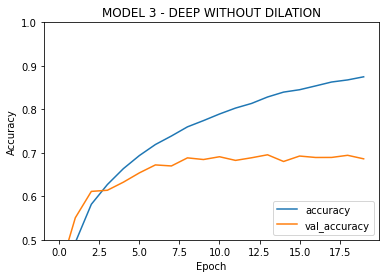

In [21]:
print ("Train Accuracy 3 =" , history3.history['accuracy'])
print("Test Accuracy 3 = " , history3.history['val_accuracy'])
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.title('MODEL 3 - DEEP WITHOUT DILATION')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc3 = np.mean(history3.history['accuracy'])
test_acc3 = np.mean(history3.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc3)
print("AVERAGE TEST ACCURACY =",test_acc3)

## **MODEL 3.1 - CHANGING OPTIMISER IN THE  MODEL 3**

---



In [22]:
model3.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3_1 = model3.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 0.3149 - accuracy: 0.8929 - val_loss: 1.2399 - val_accuracy: 0.6916
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2818 - accuracy: 0.9030 - val_loss: 1.2175 - val_accuracy: 0.6911
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2676 - accuracy: 0.9085 - val_loss: 1.2119 - val_accuracy: 0.6882
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2568 - accuracy: 0.9122 - val_loss: 1.4105 - val_accuracy: 0.6823
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2504 - accuracy: 0.9137 - val_loss: 1.3122 - val_accuracy: 0.6914
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2413 - accuracy: 0.9168 - val_loss: 1.3373 - val_accuracy: 0.6920
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2237 - accuracy: 0.9238 - val_loss: 1.3961 - val_ac

In [ ]:
print ("Train Accuracy 3.1 =" , history3_1.history['accuracy'])
print("Test Accuracy 3 = " , history3_1.history['val_accuracy'])
plt.plot(history3_1.history['accuracy'], label='accuracy')
plt.plot(history3_1.history['val_accuracy'], label = 'val_accuracy')
plt.title('NETWORK MODEL 3.1 - WITHOUT DILATION WITH NADAM OPTIMISER')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc3_1 = np.mean(history3_1.history['accuracy'])
test_acc3_1 = np.mean(history3_1.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc3_1)
print("AVERAGE TEST ACCURACY =",test_acc3_1)

## **MODEL 4 - DEEPER LAYERS with NADAM OPTIMISER and 50 epochs**

In [24]:
model4 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', padding='same',input_shape=(32,32,3) , data_format = 'channels_first'),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [25]:
model4.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 19s 11ms/step - loss: 2.3163 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 -

Train Accuracy 4 = [0.09780000150203705, 0.09736000001430511, 0.09867999702692032, 0.09697999805212021, 0.09808000177145004, 0.09709999710321426, 0.09867999702692032, 0.09933999925851822, 0.09781999886035919, 0.09634000062942505, 0.09865999966859818, 0.09852000325918198, 0.0995199978351593, 0.0972599983215332, 0.09929999709129333, 0.0997999981045723, 0.098860003054142, 0.10016000270843506, 0.09818000346422195, 0.09809999912977219, 0.09777999669313431, 0.09538000077009201, 0.095660001039505, 0.09589999914169312, 0.09758000075817108, 0.10087999701499939, 0.09703999757766724, 0.09774000197649002, 0.09898000210523605, 0.09827999770641327, 0.09922000020742416, 0.09787999838590622, 0.09815999865531921, 0.09629999846220016, 0.09827999770641327, 0.09907999634742737, 0.09927999973297119, 0.0980599969625473, 0.09765999764204025, 0.09811999648809433, 0.09808000177145004, 0.09815999865531921, 0.09784000366926193, 0.09898000210523605, 0.09854000061750412, 0.09774000197649002, 0.09848000109195709, 0

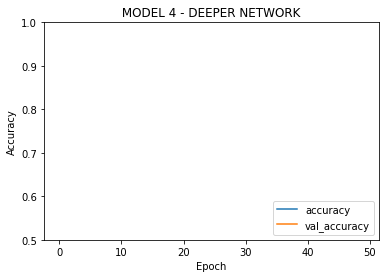

In [30]:
print ("Train Accuracy 4 =" , history4.history['accuracy'])
print("Test Accuracy 4 = " , history4.history['val_accuracy'])
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.title(' MODEL 4 - DEEPER NETWORK ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc4 = np.mean(history4.history['accuracy'])
test_acc4 = np.mean(history4.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc4)
print("AVERAGE TEST ACCURACY =",test_acc4)

## **MODEL 5 - INCREASING FEATURES TO BE LEARNT AT EACH DEEP LAYER**



In [31]:
model5 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', padding='same',input_shape=(32,32,3) , data_format = 'channels_first'),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(128, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(256, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(512, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(1024, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [32]:
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history5 = model5.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3030 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3028 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3027 -

Train Accuracy 5 = [0.0966000035405159, 0.09713999927043915, 0.09950000047683716, 0.09623999893665314, 0.09895999729633331, 0.09650000184774399, 0.09780000150203705, 0.09849999845027924, 0.09826000034809113, 0.098860003054142, 0.09780000150203705, 0.09808000177145004, 0.0993800014257431, 0.09956000000238419, 0.09826000034809113, 0.0972599983215332, 0.09787999838590622, 0.09771999716758728, 0.09809999912977219, 0.09781999886035919, 0.10013999789953232, 0.09876000136137009, 0.09793999791145325, 0.09685999900102615, 0.09963999688625336, 0.09647999703884125, 0.09697999805212021, 0.09657999873161316, 0.10056000202894211, 0.09861999750137329]
Test Accuracy 5 =  [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612,

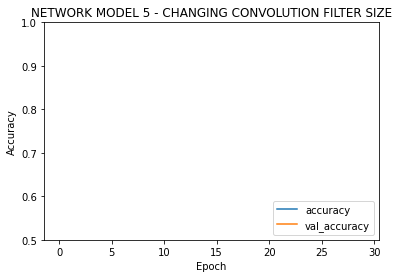

In [33]:
print ("Train Accuracy 5 =" , history5.history['accuracy'])
print("Test Accuracy 5 = " , history5.history['val_accuracy'])
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.title('NETWORK MODEL 5 - CHANGING CONVOLUTION FILTER SIZE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc5 = np.mean(history5.history['accuracy'])
test_acc5 = np.mean(history5.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc5)
print("AVERAGE TEST ACCURACY =",test_acc5)

## **MODEL 6 - Convolution Features from 16 to 128**

In [35]:
model6 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(16, (3, 3),strides=(2,2), activation='relu', padding='same',input_shape=(32,32,3) , data_format = 'channels_first'),
                        tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(32, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.MaxPooling2D(2, 2),

                        tf.keras.layers.Conv2D(128, (3, 3),  activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [36]:
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history6 = model6.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy:

Train Accuracy 6 = [0.09865999966859818, 0.09741999953985214, 0.0975399985909462, 0.09651999920606613, 0.09939999878406525, 0.09793999791145325, 0.09769999980926514, 0.09824000298976898, 0.09950000047683716, 0.09839999675750732, 0.09796000272035599, 0.09610000252723694, 0.09830000251531601, 0.09653999656438828, 0.09762000292539597, 0.09814000129699707, 0.09867999702692032, 0.09799999743700027, 0.09849999845027924, 0.0966000035405159]
Test Accuracy 6 =  [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612]
AVERAGE TRAIN ACCURACY = 0.09788799993693828
AVERAGE TEST ACCURACY = 0.10000000149011612


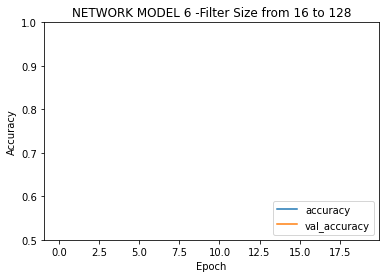

In [37]:
print ("Train Accuracy 6 =" , history6.history['accuracy'])
print("Test Accuracy 6 = " , history6.history['val_accuracy'])
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.title('NETWORK MODEL 6 -Filter Size from 16 to 128')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc6 = np.mean(history6.history['accuracy'])
test_acc6 = np.mean(history6.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc6)
print("AVERAGE TEST ACCURACY =",test_acc6)

## **MODEL 7 - Using HeUniform Initialiser with SGD Optimiser and Dropouts**

In [38]:
initializer = tf.keras.initializers.HeUniform()
model7 = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3),strides=(2,2), activation='sigmoid', padding='same',input_shape=(32,32,3) , data_format = 'channels_first'),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid',padding='same' ,kernel_initializer=initializer),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.1),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3),  activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Dropout(0.1),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.1),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.1),

                        tf.keras.layers.Conv2D(64, (3, 3),  activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same',kernel_initializer=initializer),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(128, activation='sigmoid'),
                        tf.keras.layers.Dropout(0.1),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [40]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001 ,momentum=0.9)
model7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')

history7 = model7.fit(train_images, train_labels, epochs=50, batch_size =2000,
                    validation_data=(test_images, test_labels))

Epoch 1/50
25/25 [==============================] - 6s 220ms/step - loss: 2.3195 - accuracy: 0.1029 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
25/25 [==============================] - 5s 208ms/step - loss: 2.3210 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
25/25 [==============================] - 5s 212ms/step - loss: 2.3207 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
25/25 [==============================] - 5s 215ms/step - loss: 2.3183 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
25/25 [==============================] - 5s 216ms/step - loss: 2.3187 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
25/25 [==============================] - 5s 212ms/step - loss: 2.3195 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
25/25 [==============================] - 5s 209ms/step - loss: 2.3190 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 

Train Accuracy 7 = [0.10204000025987625, 0.09905999898910522, 0.09917999804019928, 0.10091999918222427, 0.09989999979734421, 0.09777999669313431, 0.10085999965667725, 0.09799999743700027, 0.10053999722003937, 0.09954000264406204, 0.10238000005483627, 0.09758000075817108, 0.09914000332355499, 0.09831999987363815, 0.098860003054142, 0.10085999965667725, 0.1014999970793724, 0.09929999709129333, 0.09702000021934509, 0.10113999992609024, 0.0995199978351593, 0.10051999986171722, 0.10087999701499939, 0.09957999736070633, 0.09976000338792801, 0.09774000197649002, 0.10056000202894211, 0.10080000013113022, 0.10091999918222427, 0.10041999816894531, 0.10273999720811844, 0.10127999633550644, 0.10096000134944916, 0.1006999984383583, 0.09830000251531601, 0.09914000332355499, 0.09989999979734421, 0.09984000027179718, 0.10080000013113022, 0.10102000087499619, 0.10081999748945236, 0.10119999945163727, 0.09883999824523926, 0.10068000108003616, 0.09827999770641327, 0.09860000014305115, 0.10085999965667725

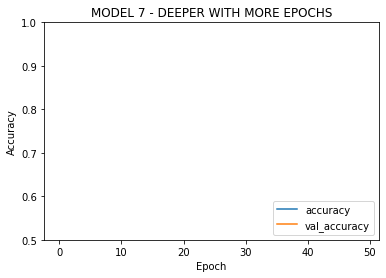

In [41]:
print ("Train Accuracy 7 =" , history7.history['accuracy'])
print("Test Accuracy 7 = " , history7.history['val_accuracy'])
plt.plot(history7.history['accuracy'], label='accuracy')
plt.plot(history7.history['val_accuracy'], label = 'val_accuracy')
plt.title('MODEL 7 - DEEPER WITH MORE EPOCHS')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc7 = np.mean(history7.history['accuracy'])
test_acc7 = np.mean(history7.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc7)
print("AVERAGE TEST ACCURACY =",test_acc7)

## **MODEL 9 - Using BatchNormalisation , Dropouts and Data Augmentation**

In [42]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,BatchNormalization ,Dropout , Dense, Activation ,Flatten
from tensorflow.keras.metrics import Precision ,Recall
model9 = Sequential()

# Convolutional Layer
model9.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
# Pooling layer
model9.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model9.add(Dropout(0.25))

model9.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))

model9.add(Flatten())
# model.add(Dropout(0.2))
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.25))
model9.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]
model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = data.load_data()
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_cat_train = to_categorical(train_labels, 10)
y_cat_test = to_categorical(test_labels, 10)

In [45]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_images, y_cat_train, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

In [46]:
y_cat_test.shape


(10000, 10)

In [47]:
test_labels.shape

(10000, 1)

In [48]:
history9 = model9.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(test_images, y_cat_test)
             )

Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.9270 - accuracy: 0.3293 - precision: 0.5135 - recall: 0.1251 - val_loss: 1.3720 - val_accuracy: 0.4896 - val_precision: 0.6650 - val_recall: 0.3377
Epoch 2/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2993 - accuracy: 0.5365 - precision: 0.7040 - recall: 0.3580 - val_loss: 1.2281 - val_accuracy: 0.5884 - val_precision: 0.7045 - val_recall: 0.4750
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0931 - accuracy: 0.6185 - precision: 0.7539 - recall: 0.4742 - val_loss: 0.9184 - val_accuracy: 0.6805 - val_precision: 0.7739 - val_recall: 0.5916
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.9718 - accuracy: 0.6646 - precision: 0.7884 - recall: 0.5446 - val_loss: 0.8713 - val_accuracy: 0.7004 - val_precision: 0.7911 - val_recall: 0.6199
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8850 - a

Train Accuracy 9 = [0.40371838212013245, 0.5565962195396423, 0.6294228434562683, 0.6716698408126831, 0.7004482746124268, 0.721141517162323, 0.7388128638267517, 0.751641035079956, 0.7623879313468933, 0.773895263671875, 0.7813200354576111, 0.7860230803489685, 0.7946285605430603, 0.7989713549613953, 0.8056156039237976, 0.8103786706924438, 0.8177633881568909, 0.8195044994354248, 0.8250080347061157, 0.8269892930984497, 0.8320124745368958, 0.8336535096168518, 0.8343740105628967, 0.8408381342887878, 0.8409982323646545, 0.8450407981872559, 0.846962034702301, 0.8478826284408569, 0.8505443334579468, 0.8504642844200134, 0.8527257442474365, 0.8550072312355042, 0.857088565826416, 0.8567883372306824, 0.8605907559394836, 0.8610110282897949, 0.8629322648048401, 0.8641530871391296, 0.8622718453407288, 0.8654538989067078, 0.8673350811004639, 0.8670549392700195, 0.8685758709907532, 0.8697566390037537, 0.870997428894043, 0.8720981478691101, 0.872058093547821, 0.8723382949829102, 0.8760406374931335, 0.8723

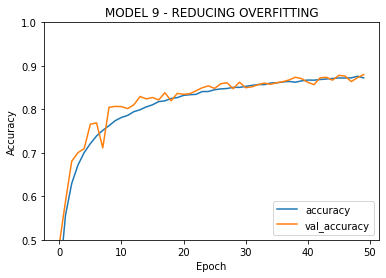

In [49]:
print ("Train Accuracy 9 =" , history9.history['accuracy'])
print("Test Accuracy 9 = " , history9.history['val_accuracy'])
plt.plot(history9.history['accuracy'], label='accuracy')
plt.plot(history9.history['val_accuracy'], label = 'val_accuracy')
plt.title('MODEL 9 - REDUCING OVERFITTING')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
train_acc9 = np.mean(history9.history['accuracy'])
test_acc9 = np.mean(history9.history['val_accuracy'])
print("AVERAGE TRAIN ACCURACY =",train_acc9)
print("AVERAGE TEST ACCURACY =",test_acc9)

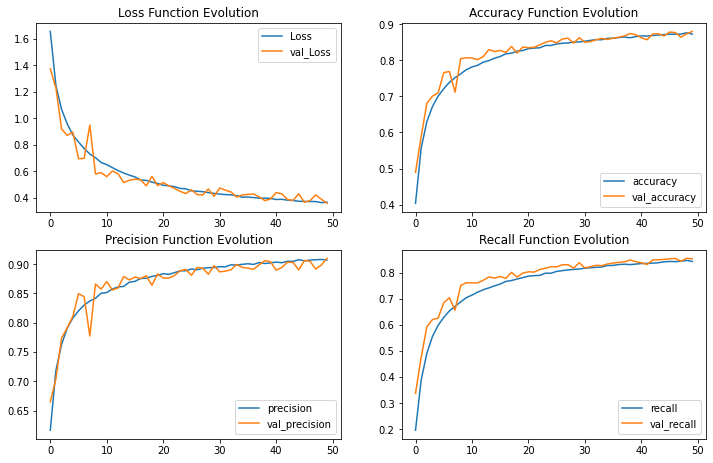

In [51]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history9.history['loss'], label='Loss')
plt.plot(history9.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history9.history['accuracy'], label='accuracy')
plt.plot(history9.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history9.history['precision'], label='precision')
plt.plot(history9.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history9.history['recall'], label='recall')
plt.plot(history9.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()


plt.show()

In [54]:
Model_Accuracy = model9.evaluate(test_images, y_cat_test)
print('MODEL 9 Test Accuracy :',Model_Accuracy[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3584 - accuracy: 0.8798 - precision: 0.9099 - recall: 0.8527
MODEL 9 Test Accuracy : 0.879800021648407
